# Mortes em Itália devido ao Covid-19, por região #

## Ligação ao Qgis ##

In [1]:
import os
import sys
from osgeo import ogr
os.environ['QT_QPA_PLATFORM'] = 'offscreen'
sys.path.insert(0,'/usr/local/share/qgis/python')
from qgis.core import *
QgsApplication.setPrefixPath("/usr/local", True) 
from qgis.gui import *
from qgis import processing

from qgis.PyQt.QtGui import QColor, QImage
from qgis.PyQt.QtCore import QSize, QBuffer, QIODevice

qgs = QgsApplication([], False)
qgs.initQgis()
print(QgsApplication.showSettings())

Application state:
QGIS_PREFIX_PATH env var:		/Users/dianamartins/anaconda3/QGIS.app/Contents/MacOS
Prefix:		/Users/dianamartins/anaconda3/QGIS.app/Contents/MacOS
Plugin Path:		/Users/dianamartins/anaconda3/QGIS.app/Contents/MacOS/../PlugIns/qgis
Package Data Path:	/Users/dianamartins/anaconda3/QGIS.app/Contents/MacOS/../Resources
Active Theme Name:	
Active Theme Path:	/Users/dianamartins/anaconda3/QGIS.app/Contents/MacOS/../Resources/resources/themes//icons/
Default Theme Path:	:/images/themes/default/
SVG Search Paths:	/usr/local/../Resources/svg/
		/Users/dianamartins/anaconda3/QGIS.app/Contents/MacOS/../Resources/svg/
		/Users/dianamartins/Library/Application Support/profiles/default/svg/
User DB Path:	/Users/dianamartins/anaconda3/QGIS.app/Contents/MacOS/../Resources/resources/qgis.db
Auth DB Path:	/Users/dianamartins/Library/Application Support/profiles/default/qgis-auth.db



## Carregar uma camada a partir de uma tabela guardada num Geopackage ##

In [15]:
italy_gpkg = "Italy_deaths.gpkg"
conn = ogr.Open(italy_gpkg)
for i in conn:
    vlayer = QgsVectorLayer("{}|layername={}".format(italy_gpkg, i.GetName()), i.GetName(), "ogr")
    if not vlayer.isValid():
        print("Layer {} failed to load".format(i.GetName()))
    else:
        QgsProject.instance().addMapLayer(vlayer)
        print("Layer {} loaded".format(i.GetName()))

Layer Italy_covid loaded
Layer casos_italia_atual loaded
Layer layer_styles loaded


### Gerar o mapa com as mortes por região ###

In [23]:
italy_covid = QgsProject.instance().mapLayersByName('Italy_covid')[0]
cases_italy = QgsProject.instance().mapLayersByName('casos_italia_atual')[0]

In [34]:
from qgis.PyQt.QtGui import QColor, QImage
from qgis.PyQt.QtCore import QSize, QBuffer, QIODevice

xt = italy_covid.extent()
#print(xt)
width  = 1000
height = int(width*xt.height()/xt.width())
print("Gerar mapa com {} por {}".format(width, height))

options = QgsMapSettings()
options.setLayers([cases_italy, italy_covid,])
options.setBackgroundColor(QColor(255, 255, 255))
options.setOutputSize(QSize(width, height))
options.setExtent(xt)
           
render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()

image = render.renderedImage()

Gerar mapa com 1000 por 975


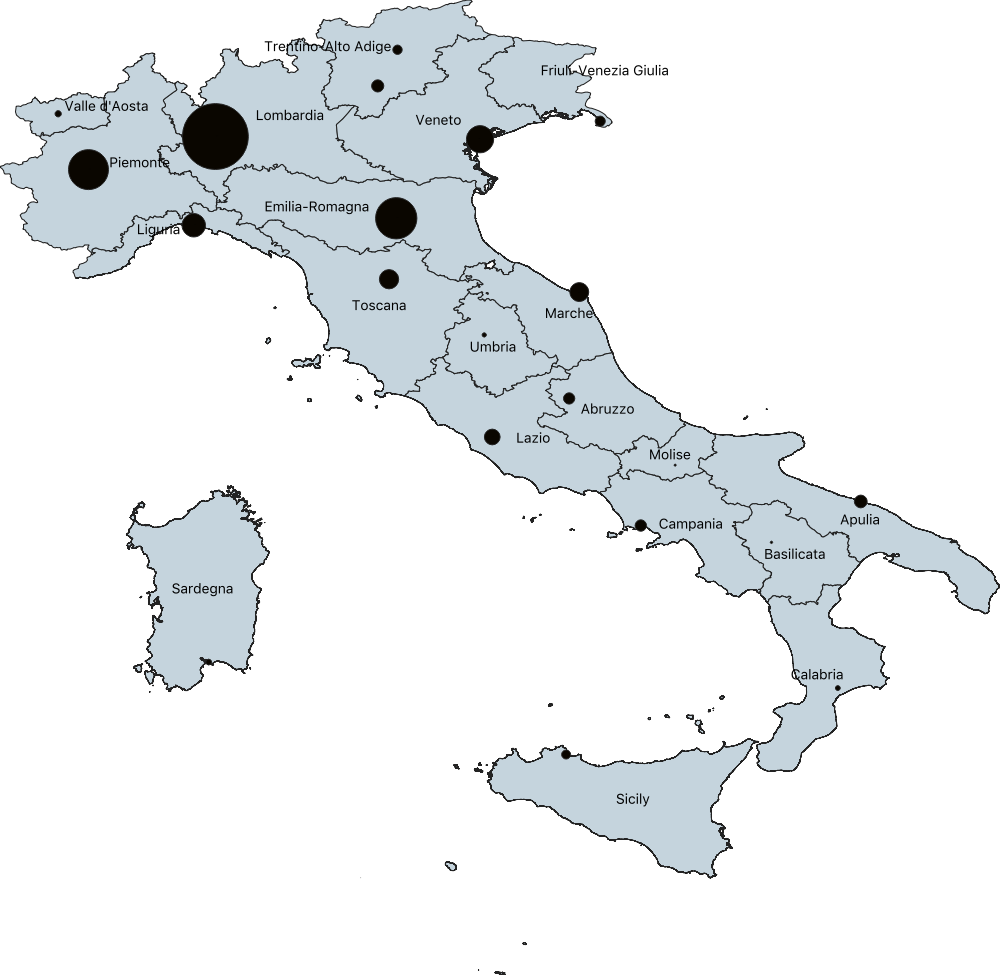

In [35]:
from IPython.display import Image

imgbuf= QBuffer()
imgbuf.open( QIODevice.ReadWrite )
image.save( imgbuf,"PNG" )
Image( imgbuf.data() )